# Numerical Solutions for the Bethe Equations

## Goal

Solve the system of equations

$z_1^L = -\frac{1 + z_1 z_2 - \Delta z_1}{1 + z_1 z_2 - \Delta z_2}$


$z_2^L = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

and check the identity

$\mathbf{1}((x_1 < x_2) = (y_1 < y_2) \mod L) = \sum_{z \in Sol} \frac{B_1(z_1, z_2)B_2(z_1, z_2)}{z_1^{y_1+1}z_2^{y_2+1}}\left(z_1^{x_1} z_2^{x_2} +A(z_1, z_2) z_1^{x_2} z_2^{x_1} \right)$

with 

$B_1(z_1, z_2) =\left( Lz_1^{L-1} + \frac{\Delta z_2 (z_1-z_2)}{(1 + z_1 z_2 -\Delta z_2)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta  z_2)}   \right)^{-1}$

$B_2(z_1, z_2) =\left( Lz_2^{L-1} + \frac{\Delta z_1 (z_2-z_1)}{(1 + z_1 z_2 -\Delta z_1)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta z_1 )}   \right)^{-1}$

$A(z_1, z_2) = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

so that $Sol$ is the set of all the solution to the system of equations above.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/tmp/ipykernel_11825/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


### Example: Finding roots

The code below finds the roots of the polynomial $z^2-1$.

In [2]:
coeff = [1, 0, -1]
sol = np.roots(coeff)
print(sol)

[-1.  1.]


## Numerical Solutions

We solve the system of equations by a fix point method: 

$(z_{1,n}, z_{2,n}) \rightarrow (z_1, z_2)$ as $n\rightarrow \infty$.

The sequence converges to a solution. We define the sequence as follows:

$z_{1, n+1} = A^{-1/L}(z_{1, n}, z_{2,n})$ and $z_{2, n+1} = A^{1/L}(z_{1, n}, z_{2,n})$.

Since there are $L$ roots of unity, we have to make a choice of which root to pick and we pick the one that is closest to the previous one. That is, we are looking for the roots of the polynomials

$z_{1, n+1}^{L} - A^{-1}(z_{1, n}, z_{2,n})$ and $z_{2, n+1}^L - A(z_{1, n}, z_{2,n})$

with respect to $z_{n+1}$.

### Defining the constant coefficient

We define the $A(z_1, z_2)$ and $A^{-1}(z_1, z_2)$ as the coefficients $c1$ and $c2$ for the pair of polynomial equations.

In [3]:
def c2(z1, z2, d):
    return -(1 + z1*z2 - d*z2)/(1+ z1*z2 - d*z1)

def c1(z1, z2, d):
    return -(1 + z1*z2 - d*z1)/(1+z1*z2 - d*z2)

In [4]:
c1(2, 3, 4)

-0.2

In [5]:
c2(2,3,4)

-5.0

In [6]:
c1(2, 3, 4)*c2(2, 3, 4)

1.0

### Defining the polynomial

A polynomial is defined as a list of coefficients. The polynimials that we are trying to solve

$z_1^L - c1 =0$  and $z_2^L - c_2=0$

corresponds to the list

[1, 0, ... , 0, -c1] and [1, 0, ... , -c2].

We define a functions below to give such lists.

In [7]:
def pol_coeff1(l, z1, z2, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c1(z1, z2, d))
    return coeff

In [8]:
pol_coeff1(5, 2, 3, 4)
np.roots(pol_coeff1(5, 2, 3, 4))

array([-0.72477966+0.j        , -0.22396923+0.68930642j,
       -0.22396923-0.68930642j,  0.58635907+0.4260148j ,
        0.58635907-0.4260148j ])

In [9]:
def pol_coeff2(l, z1, z2, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c2(z1, z2, d))
    return coeff

In [10]:
pol_coeff2(5, 2, 3, 4)

[1, 0, 0, 0, 0, 5.0]

In [11]:
pol_coeff2(2, 1, 1, 0)

[1, 0, 1.0]

### Finding close solutions

When we obtain the solutions of the polynomial equations, we obtain $L$ solutions but we are only interested in the solution that is closest to the previous element of the sequence $(z_{1,n}, z_{2,n})$. The code below solves the polynomials and returns the "closest" solutions.

In [12]:
def close_sol1(l, z1, z2, d, s ):
    sols = np.roots(pol_coeff1(l, z1, z2, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s


In [13]:
close_sol1(2, 1j, -1j, 0.1, 1j)

(0.049937616943892205+0.9987523388778446j)

In [14]:
def close_sol2(l, z1, z2, d, s ):
    sols = np.roots(pol_coeff2(l, z1, z2, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s

In [15]:
close_sol2(2, 1j, -1j, 0.1, 1j)

(-0.04993761694389226+0.9987523388778448j)

### Setting up a recursion

We now set up a recursion to give us the an arbitrary element of the sequence $(z_{1,n}, z_{2,n})$. The starting point of the recursion is label by an index $(k_1, k_2)$ so that $k_i \in \{1, \dots, L\}$ and 

$(z_{1,0}, z_{2,0}) = (e^{2 \pi i k_1/L}, e^{2\pi i k_2/L})$,

i.e. the solutions of the system of equations with $\Delta = 0$.

Notation: n= trails.

In [16]:
l=5
sol = np.roots(pol_coeff1(l, 0, 0, 0))
print(sol)
z= [sol[1], sol[2]]
print(z)


[-1.        +0.j         -0.30901699+0.95105652j -0.30901699-0.95105652j
  0.80901699+0.58778525j  0.80901699-0.58778525j]
[(-0.3090169943749479+0.9510565162951541j), (-0.3090169943749479-0.9510565162951541j)]


In [17]:
d=.1
z= [close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
print(z)

[(-0.2911619922237325+0.9566737658597665j), (-0.2911619922237325-0.9566737658597665j)]


In [18]:
def sol_sys(l, d, k1, k2, trails):
    sol = np.roots(pol_coeff1(l, 0, 0, 0))
    z = [sol[k1], sol[k2]]
    for i in range(trails):
        z=[close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
    return (z[0], z[1])

In [19]:
sol_sys(5, 0.1, 1, 2, 30)

((-0.2910397456371135+0.956710962861556j),
 (-0.2910397456371135-0.956710962861556j))

In [20]:
sol_sys(5, 0.1, 0, 1, 30)

((-0.9999004932239454-0.01410686536793182j),
 (-0.2955698188574211+0.955321140863423j))

In [21]:
sol_sys(5, 10, 0, 1, 30)

((-0.9434203418185536-0.33159924403255625j),
 (0.023836703374754385+0.9997158654198816j))

### Checking the solution

We check the solution by showing that 

$z_{1,n}^L - A^{-1}(z_n)$ and $z_{2,n}^{L} - A(z_n)$

are close to zero.

Notation: n= trails.

In [22]:
l=5
d=0.1
k1=1
k2=4
trails=30
z= sol_sys(l, d, k1, k2, trails)
print(z[0]**l - c1(z[0], z[1], d))
print(z[1]**l- c2(z[0], z[1], d))

(-6.661338147750939e-16-2.789435349370706e-15j)
(-8.881784197001252e-16-8.604228440844963e-16j)


### Checking that all solutions are different

We check that all the solutions labelled by the indexes $(k_1, k_2)$ with $k_i \in \{1, \dots, L\}$ are distinct. This proves that we have found all the different solutions.

In [23]:
[(i,j) for i in range(l) for j in range(i+1, l)]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [24]:
l=5
d=.1
trails=300
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
print(all_sol)

[((-0.9999004932239464-0.014106865367932042j), (-0.29556981885742145+0.9553211408634232j)), ((-0.9999004932239464+0.014106865367932042j), (-0.29556981885742145-0.9553211408634232j)), ((-0.9982161702461371-0.05970324496318047j), (0.8426665326923638+0.5384358036760087j)), ((-0.9982161702461371+0.05970324496318047j), (0.8426665326923638-0.5384358036760087j)), ((-0.29556981885742145+0.9553211408634232j), (-0.9999004932239464-0.014106865367932042j)), ((-0.2910397456371135+0.956710962861556j), (-0.2910397456371135-0.956710962861556j)), ((-0.2695024611955084+0.9629997006279731j), (0.7840690931242289+0.6206735512387719j)), ((-0.28631282465912894+0.9581361940954486j), (0.8227661423655492-0.5683800444921631j)), ((-0.29556981885742145-0.9553211408634232j), (-0.9999004932239464+0.014106865367932042j)), ((-0.2910397456371135-0.956710962861556j), (-0.2910397456371135+0.956710962861556j)), ((-0.28631282465912894-0.9581361940954486j), (0.8227661423655492+0.5683800444921631j)), ((-0.2695024611955084-0.

In [25]:
diff =[abs(x[0]-y[0])+abs(x[1]-y[1]) for x in all_sol for y in all_sol if x != y]
diff.sort()
print(diff)

[1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1962780972783784, 1.1962780972783784, 1.1962780972783784, 1.1962780972783784, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657,

### Plotting the solutions

We plot the solutions.

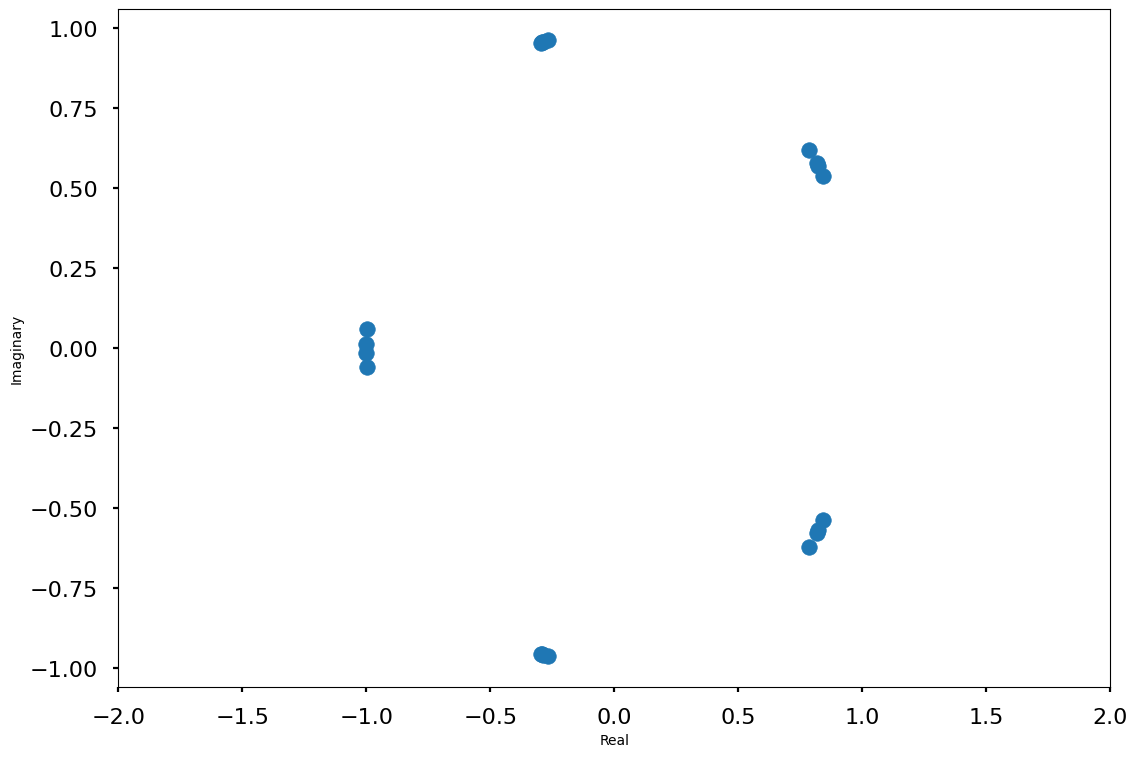

In [26]:
# import library
import matplotlib.pyplot as plt


# extract real part
x = [ele[1].real for ele in all_sol]
# extract imaginary part
y = [ele[1].imag for ele in all_sol]

# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.xlim([-2,2])
plt.show()


## Checking the initial conditons

We check the identity

$\mathbf{1}((x_1 < x_2) = (y_1 < y_2) \mod L) = \sum_{z \in Sol} \frac{B_1(z_1, z_2)B_2(z_1, z_2)}{z_1^{y_1+1}z_2^{y_2+1}}\left(z_1^{x_1} z_2^{x_2} +A(z_1, z_2) z_1^{x_2} z_2^{x_1} \right)$

with 

$B_1(z_1, z_2) =\left( Lz_1^{L-1} + \frac{\Delta z_2 (z_1-z_2)}{(1 + z_1 z_2 -\Delta z_2)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta  z_2)}   \right)^{-1}$

$B_2(z_1, z_2) =\left( Lz_2^{L-1} + \frac{\Delta z_1 (z_2-z_1)}{(1 + z_1 z_2 -\Delta z_1)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta z_1 )}   \right)^{-1}$

$A(z_1, z_2) = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

so that $Sol$ is the set of all the solution to the system of equations above.

### Define A(z1, z2) function

In [27]:
def A(z1, z2, d):
    return (-1)* (1 + z1*z2 - d*z2)/(1 + z1 *z2 - d*z1)

In [28]:
A(1,2,4)

-5.0

In [29]:
d=0.1
A(all_sol[1][0], all_sol[1][1], d)


(-0.9975133206205744-0.07047818942421406j)

In [30]:
d=0.1
[A(sol[0], sol[1],d) for sol in all_sol]

[(-0.9975133206205744+0.07047818942421406j),
 (-0.9975133206205744-0.07047818942421406j),
 (-0.955721667149654+0.2942721443505743j),
 (-0.955721667149654-0.2942721443505743j),
 (-0.9975133206205743-0.07047818942421415j),
 (-0.9955637246025222-0.09408969261058067j),
 (-0.9787720322818798-0.20495196711132008j),
 (-0.9929379799478917-0.11863459856635383j),
 (-0.9975133206205743+0.07047818942421415j),
 (-0.9955637246025222+0.09408969261058067j),
 (-0.9929379799478917+0.11863459856635383j),
 (-0.9787720322818798+0.20495196711132008j),
 (-0.9557216671496547-0.2942721443505744j),
 (-0.9787720322818787+0.20495196711131983j),
 (-0.9929379799478918-0.11863459856635387j),
 (-0.9981861191474779-0.060203584123347934j),
 (-0.9557216671496547+0.2942721443505744j),
 (-0.9929379799478918+0.11863459856635387j),
 (-0.9787720322818787-0.20495196711131983j),
 (-0.9981861191474779+0.060203584123347934j)]

### Define B1 and B2 function

In [31]:
def B1 (z1, z2 ,l, d):
    b= -l* ((1+z1*z2- d*z1)/(1+z1*z2- d*z2))
    b = b+ (d* z2*z1 *(z1-z2)/((1+z1*z2- d*z2) *(1+z1*z2- d*z2)))
    b = b - ((d*z1)/(1+z1*z2- d*z2))
    b= 1/b
    return b

In [32]:
l=5
d=0.1
sol = all_sol[0]
B1(sol[0], sol[1], l,d)

(-0.20046242430693717+0.014163448668486988j)

In [33]:
l=5
d=0.1
[B1(sol[0], sol[1], l,d) for sol in all_sol]

[(-0.20046242430693717+0.014163448668486988j),
 (-0.20046242430693717-0.014163448668486988j),
 (-0.17781807899531904+0.05475119923388591j),
 (-0.17781807899531904-0.05475119923388591j),
 (-0.20244745463856548-0.0143036987692458j),
 (-0.19977317853332502-0.01888035541626803j),
 (-0.1777028627565809-0.03721045359087801j),
 (-0.1961819128957976-0.023439492649474182j),
 (-0.20244745463856548+0.0143036987692458j),
 (-0.19977317853332502+0.01888035541626803j),
 (-0.1961819128957976+0.023439492649474182j),
 (-0.1777028627565809+0.03721045359087801j),
 (-0.21217143611525432-0.06532879354068258j),
 (-0.20480981299727366+0.04288656875455555j),
 (-0.19965308954978217-0.023854223133366003j),
 (-0.19799025823438787-0.01194138341394453j),
 (-0.21217143611525432+0.06532879354068258j),
 (-0.19965308954978217+0.023854223133366003j),
 (-0.20480981299727366-0.04288656875455555j),
 (-0.19799025823438787+0.01194138341394453j)]

In [34]:
def B2 (z1, z2 ,l, d):
    b= -l* ((1+z1*z2- d*z2)/(1+z1*z2- d*z1))
    b = b+ (d* z1 *z2*(z2-z1)/((1+z1*z2- d*z1) *(1+z1*z2- d*z1)))
    b = b - ((d*z2)/(1+z1*z2- d*z1))
    b= 1/b
    return b

In [35]:
l=5
d=0.1
[B2(sol[0], sol[1], l,d) for sol in all_sol]

[(-0.20244745463856548-0.0143036987692458j),
 (-0.20244745463856548+0.0143036987692458j),
 (-0.21217143611525432-0.06532879354068258j),
 (-0.21217143611525432+0.06532879354068258j),
 (-0.20046242430693717+0.014163448668486988j),
 (-0.19977317853332502+0.01888035541626803j),
 (-0.20480981299727366+0.04288656875455555j),
 (-0.19965308954978217+0.023854223133366003j),
 (-0.20046242430693717-0.014163448668486988j),
 (-0.19977317853332502-0.01888035541626803j),
 (-0.19965308954978217-0.023854223133366003j),
 (-0.20480981299727366-0.04288656875455555j),
 (-0.17781807899531904+0.05475119923388591j),
 (-0.1777028627565809-0.03721045359087801j),
 (-0.1961819128957976+0.023439492649474182j),
 (-0.19799025823438787+0.01194138341394453j),
 (-0.17781807899531904-0.05475119923388591j),
 (-0.1961819128957976-0.023439492649474182j),
 (-0.1777028627565809+0.03721045359087801j),
 (-0.19799025823438787-0.01194138341394453j)]

### Alternate definitions of B1 and B2

In [36]:
def C1(z1, z2, l, d):
    return - (z1/l)

def C2(z1, z2, l, d):
    c= (1/z1) + z1 -d
    c= c+ (1/z2) + z2 -d 
    c = c/(1 + z1*z2 -d*z1)
    c = c/(1+z1*z2 - d*z2)
    c = c*d*z1
    c= -c - (l/z2)
    c=1/c
    return c

In [37]:
l=5
d=0.1
[C1(sol[0], sol[1], l,d)*C2(sol[0], sol[1], l,d) for sol in all_sol]

[(0.012604368615870389-0.03879225778555272j),
 (0.012604368615870389+0.03879225778555272j),
 (-0.0331619083859602-0.02409353675221769j),
 (-0.0331619083859602+0.02409353675221769j),
 (0.012604368615870387-0.03879225778555272j),
 (0.04026623367940394-1.734723475976807e-18j),
 (-0.030604906692462377+0.022235766277709786j),
 (0.012275661153956967+0.03778060024147515j),
 (0.012604368615870387+0.03879225778555272j),
 (0.04026623367940394+1.734723475976807e-18j),
 (0.012275661153956967-0.03778060024147515j),
 (-0.030604906692462377-0.022235766277709786j),
 (-0.033161908385960205-0.024093536752217686j),
 (-0.03060490669246238+0.02223576627770979j),
 (0.012275661153956967-0.037780600241475136j),
 (0.039345416806033026+0j),
 (-0.033161908385960205+0.024093536752217686j),
 (0.012275661153956967+0.037780600241475136j),
 (-0.03060490669246238-0.02223576627770979j),
 (0.039345416806033026+0j)]

### Alternate definitions of B1 and B2

In [38]:
def D1(z1, z2, l, d):
    x = 1 + z2*z2 - d* z2
    x= x/(1 +z1 *z2 - d*z2)
    x= x/(1+z1*z2 - d*z1)
    x = x*d
    x= 1/x
    return x
def D2(z1, z2, l, d):
    x= l/(z1*z2*d)
    x = x*(1+z1*z2 - d*z1)*(1+z1*z2- d*z2)
    x = x/ (1 + z2*z2 - d*z2)
    x= x + (1/z1)*((1 +z1*z1 - d*z1)/(1 +z2*z2 - d*z2)) + (1/z2)
    x= (-l)*x
    x= 1/x
    return(x)


In [39]:
l=5
d=0.1
[D1(sol[0], sol[1], l,d)*D2(sol[0], sol[1], l,d) for sol in all_sol]

[(-0.012604368615870384+0.0387922577855527j),
 (-0.012604368615870384-0.0387922577855527j),
 (0.03316190838596019+0.024093536752217683j),
 (0.03316190838596019-0.024093536752217683j),
 (-0.01260436861587038+0.0387922577855527j),
 (-0.04026623367940394+5.204170427930421e-18j),
 (0.030604906692462384-0.022235766277709786j),
 (-0.012275661153956964-0.03778060024147514j),
 (-0.01260436861587038-0.0387922577855527j),
 (-0.04026623367940394-5.204170427930421e-18j),
 (-0.012275661153956964+0.03778060024147514j),
 (0.030604906692462384+0.022235766277709786j),
 (0.03316190838596019+0.024093536752217676j),
 (0.030604906692462387-0.02223576627770979j),
 (-0.01227566115395697+0.03778060024147516j),
 (-0.039345416806033005+3.469446951953614e-18j),
 (0.03316190838596019-0.024093536752217676j),
 (-0.01227566115395697-0.03778060024147516j),
 (0.030604906692462387+0.02223576627770979j),
 (-0.039345416806033005-3.469446951953614e-18j)]

### Alternate definitions of B1 and B2

In [40]:
def E1(z1, z2, l, d):
    e= 1 +z2*z2 - d*z2
    e = e/((1 + z1 *z2 - d*z1)*(1 + z1*z2 - d*z2))
    e = d*e
    e = e + (l/z1)
    e = -1/e
    return e

def E2(z1, z2, l, d):
    e= (1 + z1 *z2 - d*z1)*(1 + z1*z2 - d*z2)
    e = e/(1 + z1*z1 - d*z1)
    e= e*(l/d) + z1*((1+ z2*z2 -d*z2)/(1+ z1*z1 -d*z1))
    e= 1/e
    e = e + (1/z2)
    e = (-l)*e
    e = 1/e
    return e

In [41]:
l=5
d=0.1
[E1(sol[0], sol[1], l,d)*E2(sol[0], sol[1], l,d) for sol in all_sol]

[(0.012604368615870385-0.0387922577855527j),
 (0.012604368615870385+0.0387922577855527j),
 (-0.03316190838596019-0.02409353675221768j),
 (-0.03316190838596019+0.02409353675221768j),
 (0.012604368615870389-0.03879225778555272j),
 (0.04026623367940393+0j),
 (-0.030604906692462366+0.022235766277709783j),
 (0.012275661153956969+0.03778060024147514j),
 (0.012604368615870389+0.03879225778555272j),
 (0.04026623367940393+0j),
 (0.012275661153956969-0.03778060024147514j),
 (-0.030604906692462366-0.022235766277709783j),
 (-0.0331619083859602-0.024093536752217686j),
 (-0.030604906692462373+0.022235766277709783j),
 (0.012275661153956972-0.03778060024147514j),
 (0.03934541680603302+0j),
 (-0.0331619083859602+0.024093536752217686j),
 (0.012275661153956972+0.03778060024147514j),
 (-0.030604906692462373-0.022235766277709783j),
 (0.03934541680603302+0j)]

### Alternate definition of B1 and B2

In [42]:
def F1(z1, z2, l, d):
    f = - (l/z1)
    f =1/f
    return f

def F2(z1, z2, l, d):
    f=1
    #f = (1 + z1 * z2 - d *z2)/(1 +z1*z2- d*z1)
    f = -(l*f)/z2
    f = 1/f
    return f

def F3(z1, z2, l, d):
    f = ((1 + z2*z2 - d*z2)*z1) + ((1+z1*z1 - d*z1)*z2)
    f = f/((1+z1*z2 - d*z1)*(1+z1*z2 -d*z2))
    f= 1 +(f*(d/l)) 
    f =1/f
    return f

In [43]:
l=5
d=0.1
[F3(sol[0], sol[1], l,d) for sol in all_sol]

[(1.0197148413605364-7.605678882104327e-19j),
 (1.0197148413605364+7.605678882104327e-19j),
 (1.024759325716679-6.911224490767425e-17j),
 (1.024759325716679+6.911224490767425e-17j),
 (1.0197148413605364-7.605678882104327e-19j),
 (1.006655841985097+0j),
 (0.9457436279230427+5.5586292718993925e-18j),
 (0.9931218490739562+3.3050877140909927e-18j),
 (1.0197148413605364+7.605678882104327e-19j),
 (1.006655841985097+0j),
 (0.9931218490739562-3.3050877140909927e-18j),
 (0.9457436279230427-5.5586292718993925e-18j),
 (1.024759325716679-6.911224490767425e-17j),
 (0.9457436279230427+5.5586292718993925e-18j),
 (0.9931218490739562-3.3050877140909927e-18j),
 (0.9836354201508252+0j),
 (1.024759325716679+6.911224490767425e-17j),
 (0.9931218490739562+3.3050877140909927e-18j),
 (0.9457436279230427-5.5586292718993925e-18j),
 (0.9836354201508252+0j)]

In [44]:
l=5
d=0.1
[F1(sol[0], sol[1], l,d)*F2(sol[0], sol[1], l,d)*F3(sol[0], sol[1], l,d) for sol in all_sol]

[(0.012604368615870389-0.03879225778555271j),
 (0.012604368615870389+0.03879225778555271j),
 (-0.0331619083859602-0.02409353675221768j),
 (-0.0331619083859602+0.02409353675221768j),
 (0.012604368615870389-0.03879225778555271j),
 (0.040266233679403934+0j),
 (-0.030604906692462373+0.022235766277709783j),
 (0.012275661153956969+0.037780600241475136j),
 (0.012604368615870389+0.03879225778555271j),
 (0.040266233679403934+0j),
 (0.012275661153956969-0.037780600241475136j),
 (-0.030604906692462373-0.022235766277709783j),
 (-0.0331619083859602-0.02409353675221768j),
 (-0.030604906692462373+0.022235766277709783j),
 (0.012275661153956969-0.037780600241475136j),
 (0.03934541680603302+0j),
 (-0.0331619083859602+0.02409353675221768j),
 (0.012275661153956969+0.037780600241475136j),
 (-0.030604906692462373-0.022235766277709783j),
 (0.03934541680603302+0j)]

### Define a function for the terms inside the summation

In [45]:
def term_ic(x1, x2, y1, y2, l, d, sol):
    term =0
    #term = B1(sol[0], sol[1], l, d)* B2(sol[0], sol[1], l, d)
    #term = C1(sol[0], sol[1], l, d)* C2(sol[0], sol[1], l, d)
    #term = D1(sol[0], sol[1], l, d)* D2(sol[0], sol[1], l, d)
    #term = E1(sol[0], sol[1], l, d)* E2(sol[0], sol[1], l, d)
    term = F1(sol[0], sol[1], l, d)* F2(sol[0], sol[1], l, d)* F3(sol[0], sol[1], l, d)
    term = term/((sol[0]**(y1+1)) *(sol[1]**(y2+1)))
    term = term*((sol[0]**x1)*(sol[1]**x2) + A(sol[0], sol[1], d)*(sol[0]**x2)*(sol[1]**x1) )
    return term

In [46]:
l=5
d=0.1
sol = all_sol[1]
term_ic(1, 2, 1, 2, l, d, sol)

(0.026554235656798188+0.03822423870662445j)

In [47]:
l=5
d=0.1
[term_ic(1, 2, 1, 2, l, d, sol) for sol in all_sol]

[(0.026554235656798188-0.03822423870662445j),
 (0.026554235656798188+0.03822423870662445j),
 (0.06932627263138794-0.029619039058244423j),
 (0.06932627263138794+0.029619039058244423j),
 (0.026554235656798167+0.038224238706624496j),
 (0.07145284072841437+0.025470867976866613j),
 (0.03067372736861202-0.037146749865865025j),
 (0.07344576434320182-0.02099921816012479j),
 (0.026554235656798167-0.038224238706624496j),
 (0.07145284072841437-0.025470867976866613j),
 (0.07344576434320182+0.02099921816012479j),
 (0.03067372736861202+0.037146749865865025j),
 (0.06932627263138802+0.029619039058244485j),
 (0.03067372736861205+0.03714674986586487j),
 (0.07344576434320182-0.02099921816012476j),
 (0.02854715927158562-0.03783463304778064j),
 (0.06932627263138802-0.029619039058244485j),
 (0.07344576434320182+0.02099921816012476j),
 (0.03067372736861205-0.03714674986586487j),
 (0.02854715927158562+0.03783463304778064j)]

### Define a function for the summation

In [48]:
def F_ic(x1, x2, y1, y2, l, d, all_sol):
    terms = [term_ic(x1, x2, y1, y2, l, d, sol) for sol in all_sol]
    return sum(terms)

In [49]:
l=5
d=0.1
x1=1
x2=3
y1=1
y2=2
F_ic(x1, x2, y1, y2, l,d, all_sol)

(4.163336342344337e-16+1.3877787807814457e-17j)

### We check the identity

We set the parameters. The last list is a list of all possible coordinates.

In [50]:
l=5
d=0.1
y1=1
y2=2
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]


0 trails

In [51]:
trails=0
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0013289119482685+0j), (-0.008420097221389089+0j), (-0.038008241430222106+6.938893903907228e-18j), (0.005895606660810501+2.0816681711721685e-17j), (-0.001001190814030939+1.3877787807814457e-17j), (0.005261525773753342-6.938893903907228e-18j), (0.0392400547916906-1.3877787807814457e-17j), (0.0004187815823552127+0j), (-0.0020825711503803385+0j), (0.0004187815823555145+0j)]
(1.0030515617232114+2.0816681711721685e-17j)


1 trail

In [52]:
trails=1
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(0.998726026759458+1.3877787807814457e-17j), (-0.0003926245824684427+0j), (-0.0006976144868968345+0j), (-0.001150391192963389+0j), (0.0008308153697950231+6.938893903907228e-18j), (0.001100011314496982+1.3877787807814457e-17j), (0.0002499523811175311-2.0816681711721685e-17j), (-0.00030399362490300674+0j), (-0.0017341445876864897+0j), (-0.0003039936249032149+6.938893903907228e-18j)]
(0.9963240437250462+2.0816681711721685e-17j)


10 trails

In [53]:
trails=10
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0000000000000053+6.938893903907228e-18j), (1.339206523454095e-15+0j), (-8.604228440844963e-16+0j), (6.192962809237201e-15+0j), (-4.388850394221322e-15-6.938893903907228e-18j), (-5.23192600354605e-15-1.3877787807814457e-17j), (5.689893001203927e-16-2.7755575615628914e-17j), (2.5569824035898137e-15+6.938893903907228e-18j), (4.947431353485854e-15+0j), (2.3973878437999474e-15-6.938893903907228e-18j)]
(1.0000000000000129-4.163336342344337e-17j)


100 trails

In [54]:
trails=100
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1+6.938893903907228e-18j), (6.38378239159465e-16-6.938893903907228e-18j), (-3.885780586188048e-16+0j), (1.3253287356462806e-15+2.0816681711721685e-17j), (7.806255641895632e-16-5.551115123125783e-17j), (-1.2212453270876722e-15+1.3877787807814457e-17j), (4.996003610813204e-16-6.938893903907228e-18j), (-3.157196726277789e-16-6.938893903907228e-18j), (4.579669976578771e-16+0j), (7.528699885739343e-16+6.938893903907228e-18j)]
(1.0000000000000027-2.7755575615628914e-17j)


1000 trails

In [55]:
trails=9000
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0000000000000002+0j), (6.245004513516506e-16-6.938893903907228e-18j), (-5.273559366969494e-16-6.938893903907228e-18j), (6.071532165918825e-16+2.0816681711721685e-17j), (1.214306433183765e-16-2.0816681711721685e-17j), (-2.7755575615628914e-16+1.3877787807814457e-17j), (-6.938893903907228e-17-6.938893903907228e-18j), (-3.365363543395006e-16+6.938893903907228e-18j), (6.661338147750939e-16+0j), (4.475586568020162e-16+6.938893903907228e-18j)]
(1.0000000000000018+6.938893903907228e-18j)


In [56]:
trails=12000
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0000000000000002+0j), (2.914335439641036e-16-6.938893903907228e-18j), (-4.85722573273506e-16+0j), (1.3253287356462806e-15+6.938893903907228e-18j), (5.377642775528102e-16-4.85722573273506e-17j), (-6.938893903907228e-16+1.3877787807814457e-17j), (5.689893001203927e-16+0j), (2.5326962749261384e-16-6.938893903907228e-18j), (-5.551115123125783e-17+0j), (1.4224732503009818e-16+0j)]
(1.0000000000000022-4.163336342344337e-17j)


In [57]:
trails=20000
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(0.9999999999999997+6.938893903907228e-18j), (3.885780586188048e-16-6.938893903907228e-18j), (-3.608224830031759e-16+0j), (4.198030811863873e-16+6.938893903907228e-18j), (1.700029006457271e-16-6.938893903907228e-18j), (-9.020562075079397e-17+1.3877787807814457e-17j), -1.3877787807814457e-17j, (9.367506770274758e-17-6.938893903907228e-18j), (-2.7755575615628914e-16+0j), (3.469446951953614e-18+0j)]
(1-6.938893903907228e-18j)


### Energy function

In [58]:
def E(z1, z2, d):
    return np.real(z1 + (1/z1) +z2 +(1/z2) - d)

In [59]:
[E(sol[0],sol[1],d) for sol in all_sol]

[-2.690940624162735,
 -2.690940624162735,
 -0.4110992751075483,
 -0.4110992751075483,
 -2.690940624162735,
 -1.2641589825484534,
 0.9291332638574433,
 0.9729066354128403,
 -2.690940624162735,
 -1.2641589825484534,
 0.9729066354128403,
 0.9291332638574433,
 -0.4110992751075483,
 0.9291332638574438,
 0.9729066354128403,
 3.1641589825484524,
 -0.4110992751075483,
 0.9729066354128403,
 0.9291332638574438,
 3.1641589825484524]

### Wave Function

In [60]:
def Wave(x1, x2, t, y1, y2, l, d, all_sol):
    terms = [term_ic(x1, x2, y1, y2, l, d, sol)*np.exp(-1j*t*E(sol[0], sol[1], d)) for sol in all_sol]
    return sum(terms)

In [61]:
l=5
d=0.1
y1=1
y2=2
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]

In [62]:
trails=100
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]

In [63]:
values= [Wave(x[0], x[1],0.1, y1, y2, l,d, all_sol) for x in X]
print(values)

[(0.9900499466867411-3.3581733863127794e-05j), (0.0005061957134899764-0.09900243058530496j), (-0.004952112052723265+0.0002982474176470573j), (-0.004967555885418501+0.00014891716322393278j), (-0.004967555885419021+0.00014891716322387033j), (-0.004952112052724125+0.0002982474176470573j), (0.0005061957134897821-0.09900243058530492j), (5.7985865383539115e-06+0.0004975394811026559j), (-0.009924968156341377-6.699721899437044e-05j), (5.798586539415562e-06+0.0004975394811025831j)]


### Checking Prob adds to one

In [64]:
t=0.5
probs = [abs(Wave(x[0], x[1],t, y1, y2, l,d, all_sol)**2) for x in X]
print(probs)
print(sum(probs))

[0.6072470353992431, 0.14999217081463, 0.010510255692449663, 0.011505268630627594, 0.011505268630627659, 0.010510255692449804, 0.1499921708146298, 0.003056535038000114, 0.04262450424934223, 0.003056535038000088]
1.0


### Gap probability

In [65]:
def gap_conf2(x, l):
    return [(x, j+1) for j in range(x,l)]

In [66]:
gap_conf2(5, l)

[]

In [67]:
def Prob_gap2(x, t, y1, y2, l, d, all_sol):
    X = gap_conf2(x, l)
    probs = [abs(Wave(x[0], x[1],t, y1, y2, l,d, all_sol)**2) for x in X]
    return sum(probs)

In [68]:
[x+1 for x in range(l)]

[1, 2, 3, 4, 5]

In [69]:
t=0
y1=2
y2=4
gap_probs = [Prob_gap2(x+1, t, y1,y2, l, d, all_sol) for x in range(l)]
print(gap_probs)
print(sum(gap_probs))

[1.1514322635795995e-30, 1.0000000000000004, 4.014600969075193e-31, 1.5428263672621574e-30, 0]
1.0000000000000004


### Expected Position

In [70]:
k=5
l=2*k+1
d=0.1
y1=k
y2=k+1
t=0.5

In [71]:
trails=100
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]

In [72]:
gap_probs = [Prob_gap2(x+1, t, y1,y2, l, d, all_sol) for x in range(l)]
print(gap_probs)
print(sum(gap_probs))

[6.196164922500654e-06, 0.00038882253031279925, 0.013583685074797283, 0.20678517014980655, 0.7667255728502956, 0.012488056097854635, 2.2486223587579543e-05, 1.0881878300408654e-08, 2.6149392714722904e-11, 3.9574154317134366e-13, 0]
1.0000000000000004


In [73]:
gap_avg = [(x+1-y1)*Prob_gap2(x+1, t, y1,y2, l, d, all_sol) for x in range(l)]
print(gap_avg)
print(sum(gap_avg))

[-2.4784659690002615e-05, -0.0011664675909383976, -0.027167370149594566, -0.20678517014980655, 0.0, 0.012488056097854635, 4.497244717515909e-05, 3.2645634901225965e-08, 1.0459757085889161e-10, 1.9787077158567184e-12, 0]
-0.22261073125278855


### Plotting the probability

In [74]:
X = np.arange(1, l+1, 1)
T = np.arange(0, l, 0.01)


X1, T1 = np.meshgrid(X, T)

#Z = Prob_gap2(X1, T1, y1,y2, l, d, all_sol)

Z = [[Prob_gap2(x, t, y1,y2, l, d, all_sol)for x in X ]for t in T]
Z = np.array(Z)

In [75]:
print(Z.ndim)

2


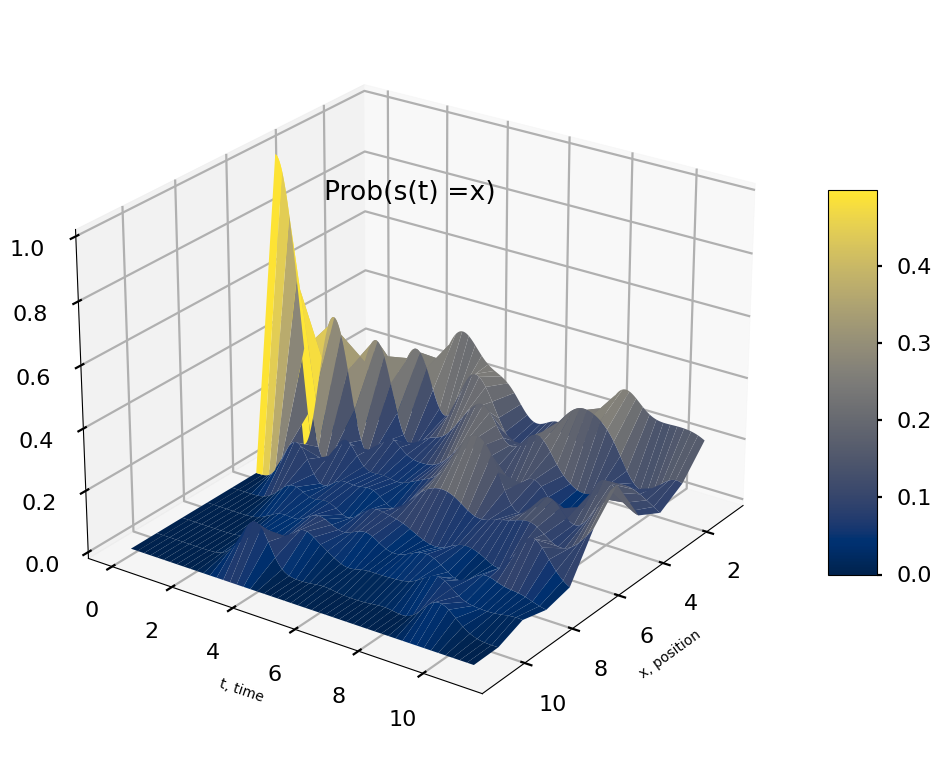

In [76]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X1, T1, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x, position', labelpad=15)
ax.set_ylabel('t, time', labelpad=15) 
#ax.set_zlabel('z', labelpad=20)

ax.set_title('Prob(s(t) =x)', y=1.0, pad=-94)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

### Expected gap function

In [77]:
def Avg_gap(y1, y2, t, l, d, all_sol):
    gap_avg = [(x+1-y1)*Prob_gap2(x+1, t, y1,y2, l, d, all_sol) for x in range(l)]
    return sum(gap_avg)

In [78]:
Avg_gap(y1, y2, 0, l, d, all_sol)

1.5043502366343192e-29

### Plotting expected gap

In [79]:
k=10
l=2*k+1
d=0.1
y1=k
y2=k+1

In [80]:
trails=100
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]

In [81]:
T = np.arange(0, k, 0.01)
X = [Avg_gap(y1, y2, t, l, d, all_sol) for t in T]
print(X)

[-2.718771353150327e-28, -9.999499194518301e-05, -0.00039991988448933875, -0.0008995945279669685, -0.00159871900671883, -0.0024968741389080605, -0.0035935221745476793, -0.004888007690030814, -0.006379558676975383, -0.008067287822722636, -0.009950193979363616, -0.012027163817713031, -0.014296973662204636, -0.016758291502251197, -0.019409679175191437, -0.022249594715543004, -0.025276394864892218, -0.02848833773637869, -0.03188358562738046, -0.03546020797366928, -0.03921618443799309, -0.04314940812574757, -0.04725768892012662, -0.051538756928892274, -0.055990266034679076, -0.060609797540542826, -0.0653948639022866, -0.07034291253894223, -0.07545132971265478, -0.08071744446911701, -0.08613853262961763, -0.0917118208257158, -0.09743449056752786, -0.1033036823366069, -0.10931649969441941, -0.11547001339747168, -0.12176126551021012, -0.1281872735069137, -0.1347450343539228, -0.14143152856368413, -0.1482437242122643, -0.15517858091216674, -0.16223305373250013, -0.1694040970587722, -0.176688668

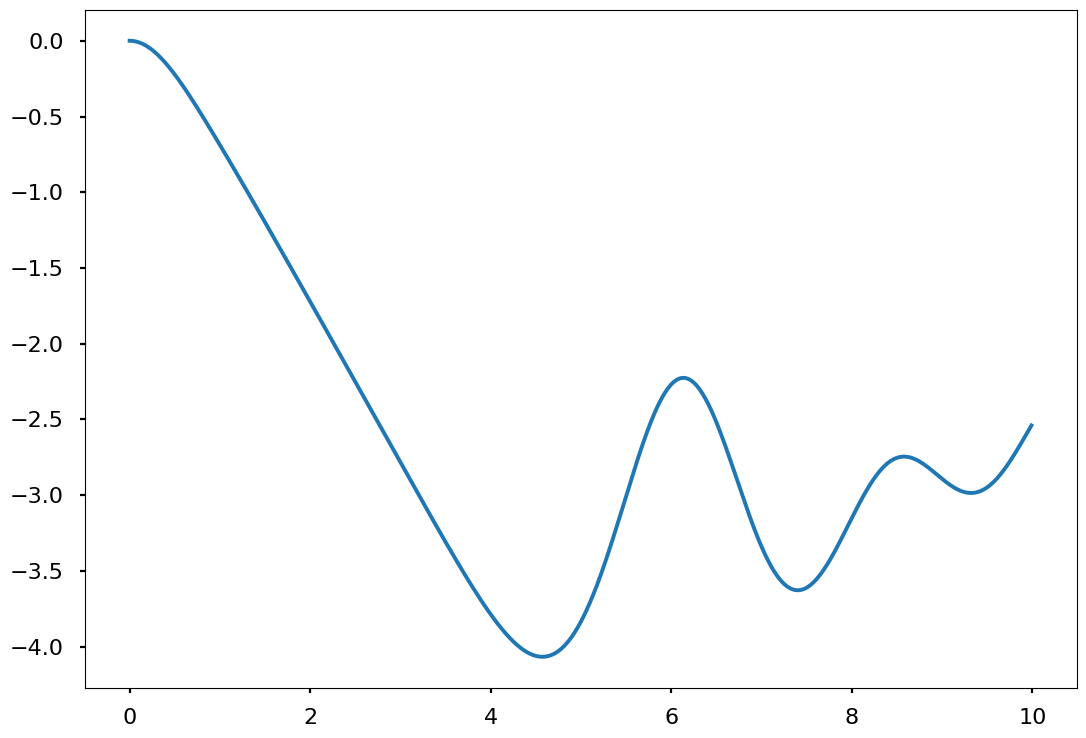

In [82]:
plt.plot(T, X)